<head>
<title> Cross-country Portfolio optimisation </title>
</head>

# Python Assignment - Applied Economic Analysis 1

## Cross-country portfolio optimisation 

|Name Student|ANR|
|----|-------|
|[Naomi Garcia Rosario](https://github.com/ngarcia95/Assignments/blob/master/CV.md)|961714|
|[Menno Bremer](https://github.com/Mennobremer/Assignments-/blob/master/CV.md)|514865|

January, 2018

### 1. Motivation
We are both enrolled in the Money, Banking and Financial Markets track of the MSc Economics at Tilburg University and are interested in Financial Markets. Therefore, we would like to analyze stocks in the Netherlands as well as other  countries using the power of Python. We think optimal portfolio analysis is very important in times of low-interest-rates, investors are looking for higher returns resulting in high risk-taking. This can result in too much risk-taking and eventually a financial crisis. Furthermore, home bias is still a very common phenomenon, especially with private investors. [Schoenmaker & Soeter, 2014](http://www.dsf.nl/wp-content/uploads/2014/09/DSF-policy-brief-No-34-New-Evidence-on-the-Home-Bias-in-European-Investment.pdf) and [Sercu & Vanpée, 2007](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.560.1649&rep=rep1&type=pdf) prove that in their portfolios, investors participate relatively too much in  equity and debt from their home country compared to the optimal portfolios. 

For our analysis, we use historical stock data of the last 6 months. We have chosen this time span, because it proves that this theory does not only hold for investors that actively manage their investments, but that it also works for passive investors. Since the latter is usually the case for private investors, we can prove that this research is relevant for Dutch households. Since, diversification is an important factor in lowering the risk-taking (or increasing the profits) of the investor, we investigate what the optimal portfolio has returned for shares in the Dutch AEX index. Secondly, we add a few foreign indices to prove that Dutch households that only invest in Dutch (AEX) shares could easily improve their portfolios by investing in, for example, foreign indices. We plot the results of our analysis in graphs and compare the two.

### 2 Research Question
***Does cross-country stock diversification improve risk-return of Dutch investors that limit their investments to AEX listed companies?***

### 3. Theoretical Framework

We will study the effect of cross-country stock diversification, so we have to determine the optimal portfolio in Country A, the Netherlands, compared to the optimal portfolio in multiple countries.  

We will use the techniques based on the Modern Portfolio Theory, developed by [Markowitz, 1952](https://www.math.ust.hk/~maykwok/courses/ma362/07F/markowitz_JF.pdf). In brief, the principles of the Modern Portfolio Theory are based on rational portfolio choices based on risk-return trade-offs and diversification[2](https://en.wikipedia.org/wiki/Modern_portfolio_theory). 



In [1]:
#First we need to import the packages to do our research
import numpy as np
import pandas as pd 
import pandas_datareader.data as web 
from datetime import date
import matplotlib.pyplot as plt 
from pandas_datareader.data import DataReader
from datetime import date

%matplotlib inline 
%precision 4
from __future__ import division
from IPython.display import display, Math, Latex



### 3.1 Risk-Return Trade-Off

We are interested in the return instead of the price, due to the fact that an absolute price increase of $q$ means a higher return for stock$_X$ than stock$_Y$ if $P_X < P_Y$. 

The holding period return can be calculated as follows:

$$R_{t+1} = \frac{P_{t+1}-P_t+D_{t+1}}{P_t}$$

Where:

$R_{t+1} = $ Holding period return

$P_t = $ Beginning price

$P_{t+1} = $ Ending price

$D_{t+1} = $ Dividend during period $t+1$

***Average Annual Return, R, and Volatility, SD(R):***

$R_t$ is the realized return of a stock in year $t$, for the years 1 through T and assuming there are 252 trading days.  

$$R = \frac{1}{T} * (R_1 + R_2 + ... + R_T) = \frac{1}{T} \sum_{t=1}^{T} R_t $$

Volatility, $SD$, is the degree of variation of the stock price over time, measured by the standard deviation of a return.
Consequently, lower volatility indicates less variation in returns over time and results in less risk-taking by the investor.

$$Var(R) = \frac{1}{T-1} \sum_{t=1}^{T} (R_t - R)^2$$

$$SD(R) = \sqrt{Var(R)}$$

***Risk Premium:***

An investor with wealth, $W$, can choose to invest his wealth in some asset class and gain an uncertain return or to store his wealth savely and gain a return equal to the risk-free rate. 
The difference between the expected return and the risk-free rate is called the excess return, the premium the investor receives by taking the risk of losing (part of) his wealth.

Since, interest rates are currently very low we assume the interest to be equal to zero. 

$$E[R(p) - R(f)]$$

***Risk Aversion:***

Risk aversion, in this case, relates to the behavior of an investor to avoid uncertainty and lower the chance of losing money. A risk averse investor would not invest in a risky investment if the risk premium is equal to zero. The first who identified this were *Kahneman & Tversky* in their [paper](http://www.princeton.edu/~kahneman/docs/Publications/prospect_theory.pdf) about prospect theory in 1979.   

We assume an investor prefers stock$_X$ over stock$_Y$ if $P_X$ = $P_Y$ and $SD_X$ < $SD_Y$.


### 3.2 Mean-Variance Utility Function

The utility investor $i$ derives from investing can be calculated as follows:

$$U_i = E(r) - \frac{1}{2}A * \sigma^2(r)$$

Where:

$U_i = $ Utility of investor i

$E(r) = $ Expected return on the asset or portfolio

$A = $ coefficient of risk aversion 

$\sigma^2(r) = $ variance of returns

$A$ and $U$ are negatively correlated, so investor$_X$ with $A=5$ derives lower Utility than investor$_Y$ with $A=3$ from a risky investment. Since A depends on the risk-aversion level of the investor, the investor can maximize utility and picking the optimal portfolio by determining the weights in each risky asset:

1. Calculate efficient frontier by maximizing the expected retrun of the risky portfolios for a level of risk

2. Determine optimal risky portfolio, $P$, by maximizing the Sharpe Ratio. Then, calculate expected return and volatility of this portfolio

3. Maximize the utility function of the investor to determine his/her optimal complete portfolio 

*Source*: Goeij, P. de. (2016), Investment Analysis Reader, *Tilburg University*





### 3.3 Efficient Frontier

Investors try to maximize their utility by investing their wealth to gain an expected return for a level of risk. The efficient frontier identifies the investment portfolio that has the highest expected return for a given level of risk. 

In this [image](https://qph.ec.quoracdn.net/main-qimg-aa58b2288b8e4584a5c1a093ed5339c4-c) the efficient frontier is displayed, to give an idea about how it *should* look like in theory. In [section 5](#5.-Efficient-Frontier-AEX) and [section 5.1](#5.1-Efficient-Frontier-Cross-Country) we will make the efficient frontier for the AEX and for the cross-country group.  

Next, we will determine the optimal portfolio as follows:

***Minimum Variance Portfolio:***

By minimizing the portfolio variance, we obtain the portfolio with the lowest risk. This is the portfolio that is situated most to the left on the Efficient Frontier. 

$$Min: Var(R_p)$$

$$E(r_p) = target$$

$$wt = \sum_{i=1}^{K} w_i = 1$$

Where: 

$w_i = $ weight of investment in $i$


***Efficient Portfolios:***

By maximizing the portfolio return, we obtain the portfolio with the highest return given a level of variance. 

$$Max: E(r_p)$$

$$Var(r_p) = target$$

$$wt = \sum_{i=1}^{K} w_i = 1$$


***Optimal Portfolio with K Risky Assets:***

The optimal portfolio is calculated as follows:

Excess retrun is defined as:

$$r_i^e = r_i - r_f$$

Expected return and variance are defined as:

$$E(r^e) = \mu^e$$

$$Var(r^e) = \sum^e$$

Next, we need to optimize the [Mean-Variance Utility Function](#3.2-Mean-Variance-Utility-Function):

$$Max_w E(r_c) - 0.5 * A * Var(r_c)$$ 

$$ = Max_w [r_f + w'\mu^e - 0.5 * A * w'\sum w]$$

Where:

$Var(r^e) \approx Var(r) = \sum$

$w =$ weights of risky assets by (K x 1) vector

Taking the First Order Condition with respect to w:

$$\mu^e - A \sum w = 0 $$

$$\rightarrow w^* = A^{-1} \sum^{-1} \mu^e $$

Where $w^*$ is a (K x 1) vector, denoting the optimal weights for the risky assets. 

We will examine the efficient frontier in our empirical analysis of the AEX stocks and compare it to the efficient frontier of portfolios including both AEX stocks and foreign indices.


### 4. Descriptive Statistics

We will use the stocks listed in the [AEX](https://en.wikipedia.org/wiki/AEX_index) index as the base case, since this is the main index in the Netherlands listing the 25 largest listed companies in the Netherlands in terms of market capitalization. We will plot the AEX to get an idea about the price movements of the 25 companies in the past year. The data is retrieved from [Yahoo Finance](https://finance.yahoo.com).

In [2]:
# Once we have imported the packages, we will import AEX stock prices from last year untill now.
start = date(2017, 7, 1)
end = date(2018, 1, 23)
ticker = ['GTO.AS', 'UL.AS', 'RDSA.AS', 'VPK.AS', 
           'AKZA.AS', 'GLPG.AS', 'REN.AS', 'ABN.AS', 'AALB.AS', 
           'WKL.AS', 'UNA.AS', 'AGN.AS', 'PHIA.AS', 'DSM.AS', 
           'HEIA.AS', 'MT.AS', 'BOKA.AS', 'NN.AS', 'INGA.AS', 
           'KPN.AS', 'SBMO.AS', 'ATC.AS', 'RAND.AS', 'ASML.AS', 'AD.AS']
data_source = 'yahoo'
stock_data = DataReader(ticker, data_source, start, end)

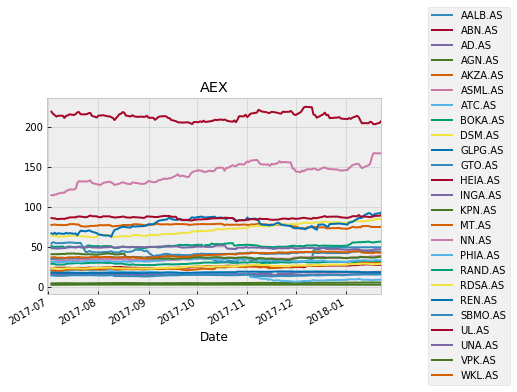

In [3]:
# Visual representation of stock movements.
plt.style.use('bmh')
stock_data['Close'].plot(title='AEX').legend(loc='right', bbox_to_anchor=(1.4, 0.5))

In [4]:
# In order to verify if the data is arranged correctly, we do a quick check of the first rows.
data = stock_data['Close']
data.head(5)

,AALB.AS,ABN.AS,AD.AS,AGN.AS,AKZA.AS,ASML.AS,ATC.AS,BOKA.AS,DSM.AS,GLPG.AS,...,NN.AS,PHIA.AS,RAND.AS,RDSA.AS,REN.AS,SBMO.AS,UL.AS,UNA.AS,VPK.AS,WKL.AS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-23,43.950001,27.450001,18.698000,5.650,75.199997,167.000000,9.516,32.060001,84.519997,93.239998,...,38.509998,33.355000,56.820000,28.920000,18.120001,15.780,207.300003,47.125000,38.119999,43.259998
2018-01-22,44.000000,27.760000,18.950001,5.712,74.860001,166.550003,9.112,31.780001,84.699997,92.059998,...,38.910000,33.320000,56.660000,28.815001,18.004999,15.700,204.800003,46.904999,37.610001,42.810001
2018-01-19,44.619999,27.700001,18.822001,5.684,74.820000,166.899994,8.980,31.559999,84.599998,91.199997,...,38.180000,33.584999,56.020000,28.525000,18.485001,15.550,203.000000,47.070000,36.900002,43.080002
2018-01-18,44.090000,28.160000,18.650000,5.708,75.000000,166.600006,8.948,31.850000,83.500000,89.260002,...,38.080002,32.834999,55.599998,28.665001,18.230000,15.725,203.000000,46.334999,36.750000,42.340000
2018-01-17,44.150002,27.990000,18.620001,5.636,74.779999,161.250000,8.568,31.809999,82.919998,90.019997,...,38.330002,32.799999,55.639999,28.584999,18.325001,15.525,205.300003,46.119999,36.669998,42.599998


### 5. Efficient Frontier AEX

Next we will make a plot of the [efficient frontier](#3.3-Efficient-Frontier). By using Monte Carlo simulation we can make a large number of different portfolios, while attaching random weights to the listed companies. We can then calculate the returns and volatilities of all generated portfolios, to create an efficient frontier. We plot the outcomes in the graph below. To do a Monte Carlo simulation in Python, we have consulted [the following page](http://www.pythonforfinance.net/2017/01/21/investment-portfolio-optimisation-with-python/).

Lastly, we have to determine the number of runs of the simulation.
The higher the number, the more accurate the Efficient Frontier is, but the longer the Monte Carlo simulation takes to run. We chose a default value of 50000, but this can be adjusted by changing the value of num_portfolios in the box below.

In [6]:
num_portfolios = 50000

In [7]:
# First, we calculate returns and volatility. For the sake of simplicity, we calculate returns by taking averages of the prices.
returns = data.pct_change()
mean_daily_returns = returns.mean()
annual_returns = mean_daily_returns * 252
cov_matrix = returns.cov()
# Next, we create three empty lists to store the characteristics of the random portfolios.
results = np.zeros((3, num_portfolios))

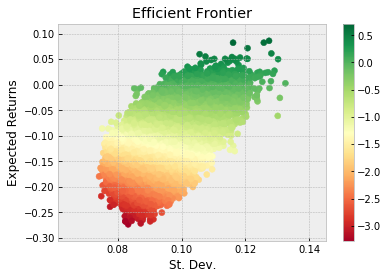

In [8]:
# Monte Carlo Simulation, depending on the amount of runs, this might take a couple of minutes to finish.
for i in range(num_portfolios):
    # For the simulation to work, the system has to generate random weights of the portfolios.
    weights = np.random.random(25)
    # The total sum of the weights had to equal 1, so we rebalance the random weights.
    weights /= np.sum(weights)
    # We calculate the returns of the random portfolios. We multiply the daily return by the number of trading days.
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    # We calculate the standard deviation of the random portfolios.
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    # We store the results of both in two lists and use these to compute a Sharpe-ratio list.
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = results[0,i] / results[1,i]
    results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])

# Now we can plot the Efficient Frontier.
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlGn')
plt.xlabel('St. Dev.')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.colorbar()

### 5.1 Efficient Frontier Cross-Country

We can see in the plot above the efficient frontier of portfolios of the AEX companies. We want to compare this to portfolios consisting of stocks listed in different countries. Therefore, we will add large foreign indices ([S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) of the United States, [Nikkei 225](https://en.wikipedia.org/wiki/Nikkei_225) of Japan, [FTSE 100](https://en.wikipedia.org/wiki/FTSE_100_Index) of the UK, the [EURONEXT 100](https://en.wikipedia.org/wiki/Euronext_100) and the Volatility Index, [VIX](https://en.wikipedia.org/wiki/VIX)). For simplicity's sake, we have chosen to add foreign indices in stead of individual shares. Private investors have limited resources to develop foreign investment strategies and investing in indices is a relatively straightforward manner to do so. 

Again, we will plot the different returns and volatilities of the randomly generated portfolios in a graph, so we can compare this to the outcome of the AEX portfolios.

In [9]:
# Now, we add foreign indices, the most popular crypto currency and a commodity.
# S&P 500, Nikkei 225, FTSE 100, EURONEXT 100 & VIX.
startnew = date(2017, 7, 1)
endnew = date(2018, 1, 23)
tickers = ['GTO.AS', 'UL.AS', 'RDSA.AS', 'VPK.AS', 
           'AKZA.AS', 'GLPG.AS', 'REN.AS', 'ABN.AS', 'AALB.AS', 
           'WKL.AS', 'UNA.AS', 'AGN.AS', 'PHIA.AS', 'DSM.AS', 
           'HEIA.AS', 'MT.AS', 'BOKA.AS', 'NN.AS', 'INGA.AS', 
           'KPN.AS', 'SBMO.AS', 'ATC.AS', 'RAND.AS', 'ASML.AS', 'AD.AS', 
           '^GSPC','^N225', '^FTSE', '^N100', 'VIX']
data_source = 'yahoo'
newstock_data = DataReader(tickers, data_source, startnew, endnew)['Close']

In [10]:
# Again, we chose the number of random portfolios.
num_newportfolios = 50000

In [11]:
# Next, we run a similar code like above for our broader range of investment opportunities.
totalreturns = newstock_data.pct_change()
mean_daily_totalreturns = totalreturns.mean()
annual_totalreturns = mean_daily_totalreturns * 252
newcov_matrix = totalreturns.cov()
newresults = np.zeros((3, num_newportfolios))

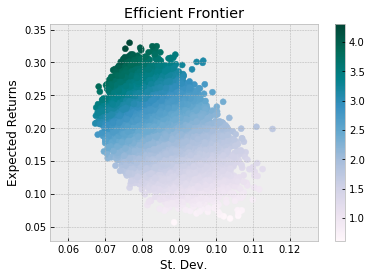

In [12]:
for i in range(num_newportfolios):
    newweights = np.random.random(30)
    newweights /= np.sum(newweights)
    portfolio_totalreturn = np.sum(mean_daily_totalreturns * newweights) * 252
    newportfolio_std_dev = np.sqrt(np.dot(newweights.T,np.dot(newcov_matrix, newweights))) * np.sqrt(252)
    newresults[0,i] = portfolio_totalreturn
    newresults[1,i] = newportfolio_std_dev
    newresults[2,i] = newresults[0,i] / newresults[1,i]
    newresults_frame = pd.DataFrame(newresults.T,columns=['ret2','stdev2','sharpe2'])

# Now we can plot the Efficient Frontier again.
plt.scatter(newresults_frame.stdev2,newresults_frame.ret2,c=newresults_frame.sharpe2,cmap='PuBuGn')
plt.xlabel('St. Dev.')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.colorbar()

### 6. Discussion and Conclusion 

By comparing the two plots of the two efficient frontiers, we can see a big difference. The minimum variance portfolio of the AEX results in a standard deviation of approximately 0.08 and an expected return of -0.11. The minimum variance portfolio of the Cross-Country group results in a standard deviation of approximately 0.068 and an expected return of 0.23. This is an economically significant difference and in this case especially interesting for Dutch households.

Finally, we discuss the shortcomings of the Modern Portfolio Theory as an investment tool. Like various other financial models the Modern Portfolio Theory is based on rational behavior of investors which does not always reflect the real world. Another critical point is the fact that the Modern Portfolio Theory are based on expectation whereas most investors use historical values which do not give an indication about extreme outliers. 

To conclude, we find evidence in favour of cross-country investment allocation compared to investing just in AEX listed companies, since this results in a higher expected return given a certain level of risk. Given our approach, we prove that passive investors can improve their risk-return easily by including foreign indices in their portfolio instead of limiting their investments to AEX listed companies. 

### 7. References

[[1]](http://www.dsf.nl/wp-content/uploads/2014/09/DSF-policy-brief-No-34-New-Evidence-on-the-Home-Bias-in-European-Investment.pdf). Schoenmaker, D. & Soeter, C. (2014). New Evidence on the Home Bias in European Investment. *DSF Policy Briefs.*
 
[[2]](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.560.1649&rep=rep1&type=pdf). Sercu, P. and Vanpée, R. (2007). Home Bias in International Equity Portfolios: a Review. *KU Leuven.*
 
[[3]](https://www.math.ust.hk/~maykwok/courses/ma362/07F/markowitz_JF.pdf). Markowitz, H. (1952). Portfolio Selection. *The Journal of Finance*, Vol. 7, No. 1. 

[[4]](https://en.wikipedia.org/wiki/Modern_portfolio_theory). Modern Portfolio Theory, *Wikipedia*.

[[5]](http://www.princeton.edu/~kahneman/docs/Publications/prospect_theory.pdf). Kahneman, D., Tversky, A. (1979). Prospect Theory: An Analysis of Decision under Risk. *Econometrica*, 47(2). 

[6] Goeij, P. de. (2016), Investment Analysis Reader, *Tilburg University*

[7] Bodie, Z., Kane, A., Marcus, A. (2014). Investments. *Mc Graw Hill*, Tenth Edition.
